In [1]:
# Importing libs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
# windows matplotlib 한글 폰트 오류 문제 해결
font_path = "C:/Windows/Fonts/malgun.ttf" # 폰트 파일 
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# minus 관련 warning
plt.rcParams['axes.unicode_minus'] = False
# mac os 용 한글 폰트 오류 해결
# rc("font",family = "AppleGothic")

In [3]:
# 파일 불러오기
nf = pd.read_csv("./netflix.csv")
nf.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8


# 데이터 전처리

In [4]:
# null 비율 확인
for i in nf.columns:
    null_rate = nf[i].isna().sum() / len(nf) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

title null rate: 0.02%
description null rate: 0.31%
age_certification null rate: 44.95%
seasons null rate: 64.74%
imdb_id null rate: 7.65%
imdb_score null rate: 9.01%
imdb_votes null rate: 9.28%
tmdb_popularity null rate: 1.62%
tmdb_score null rate: 5.48%


In [5]:
# 필요없는 열 삭제 
nf.drop(["id","description", "seasons", "imdb_id", "imdb_votes", "tmdb_popularity"], axis=1, inplace = True)
nf.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,tmdb_score
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],8.3,8.2
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],8.2,7.8
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],8.0,7.8
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],8.1,7.7


In [6]:
# col_name 변수에 변경 할 열 명들 저장
col_name = ["제목", "종류", "출시연도", "시청등급", "재생시간", "카테고리", "출시국가", "imdb평점", "tmdb평점"]

In [7]:
# 열 명 한글로 변경
nf.columns = col_name
nf.head()

,제목,종류,출시연도,시청등급,재생시간,카테고리,출시국가,imdb평점,tmdb평점
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],8.3,8.2
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],8.2,7.8
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],8.0,7.8
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],8.1,7.7


In [8]:
# 결측치 확인
nf.isnull().sum()

제목           1
종류           0
출시연도         0
시청등급      2610
재생시간         0
카테고리         0
출시국가         0
imdb평점     523
tmdb평점     318
dtype: int64

In [9]:
# 결측치 'no data'로 처리
nf["시청등급"].replace(np.nan, 'No Data',inplace  = True)
nf["imdb평점"].replace(np.nan, 'No Data',inplace  = True)
nf["tmdb평점"].replace(np.nan, 'No Data',inplace  = True)

# 제목이 없는 행 삭제
nf.dropna(axis = 0, how = "any", subset=["제목"], inplace = True)
nf.head()

,제목,종류,출시연도,시청등급,재생시간,카테고리,출시국가,imdb평점,tmdb평점
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],No Data,No Data
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],8.3,8.2
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],8.2,7.8
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],8.0,7.8
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],8.1,7.7


In [10]:
# 편의를 위해 종류 열에 있는 이름 바꿈
nf["종류"] = nf["종류"].str.replace("SHOW", "TV Show")
nf["종류"] = nf["종류"].str.replace("MOVIE", "Movie")

nf.head()

,제목,종류,출시연도,시청등급,재생시간,카테고리,출시국가,imdb평점,tmdb평점
0,Five Came Back: The Reference Films,TV Show,1945,TV-MA,48,['documentation'],['US'],No Data,No Data
1,Taxi Driver,Movie,1976,R,113,"['crime', 'drama']",['US'],8.3,8.2
2,Monty Python and the Holy Grail,Movie,1975,PG,91,"['comedy', 'fantasy']",['GB'],8.2,7.8
3,Life of Brian,Movie,1979,R,94,['comedy'],['GB'],8.0,7.8
4,The Exorcist,Movie,1973,R,133,['horror'],['US'],8.1,7.7


In [11]:
# 출시국가 열 값 전처리
nf["출시국가"] = nf["출시국가"].str.replace("[", "")
nf["출시국가"] = nf["출시국가"].str.replace("]", "")
nf.head()

,제목,종류,출시연도,시청등급,재생시간,카테고리,출시국가,imdb평점,tmdb평점
0,Five Came Back: The Reference Films,TV Show,1945,TV-MA,48,['documentation'],'US',No Data,No Data
1,Taxi Driver,Movie,1976,R,113,"['crime', 'drama']",'US',8.3,8.2
2,Monty Python and the Holy Grail,Movie,1975,PG,91,"['comedy', 'fantasy']",'GB',8.2,7.8
3,Life of Brian,Movie,1979,R,94,['comedy'],'GB',8.0,7.8
4,The Exorcist,Movie,1973,R,133,['horror'],'US',8.1,7.7


In [12]:
# 출시국가 열 값 전처리
nf["출시국가"] = nf["출시국가"].str.replace("'", "")
nf["출시국가"] = nf["출시국가"].str.replace("'", "")
nf.tail()

,제목,종류,출시연도,시청등급,재생시간,카테고리,출시국가,imdb평점,tmdb평점
5801,Fine Wine,Movie,2021,No Data,100,"['romance', 'drama']",NG,6.9,No Data
5802,Edis Starlight,Movie,2021,No Data,74,"['music', 'documentation']",,No Data,8.5
5803,Clash,Movie,2021,No Data,88,"['family', 'drama']","NG, CA",6.5,No Data
5804,Shadow Parties,Movie,2021,No Data,116,"['action', 'thriller']",,6.2,No Data
5805,Mighty Little Bheem: Kite Festival,TV Show,2021,No Data,0,"['family', 'comedy', 'animation']",,8.8,10.0


In [13]:
# 공백 값 삭제 함수 정의
def rem(x):
    if "" in x : x.remove("")
    return x

In [14]:
# 카테고리 안에 있는 데이터 전처리
nf["카테고리"] = nf["카테고리"].str.replace("[", "")
nf["카테고리"] = nf["카테고리"].str.replace("]", "")
nf["카테고리"] = nf["카테고리"].str.replace("'", "")
nf["카테고리"] = nf["카테고리"].str.split(", ")
nf["카테고리"].apply(rem)

0                   [documentation]
1                    [crime, drama]
2                 [comedy, fantasy]
3                          [comedy]
4                          [horror]
                   ...             
5801               [romance, drama]
5802         [music, documentation]
5803                [family, drama]
5804             [action, thriller]
5805    [family, comedy, animation]
Name: 카테고리, Length: 5805, dtype: object

## Netflix 컬러 팔레트

In [15]:
# windows matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf" # 폰트 파일 
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# minus 관련 warning
plt.rcParams['axes.unicode_minus'] = False

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


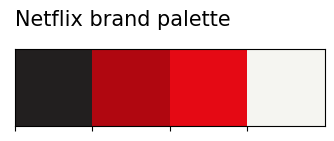

In [16]:
# Palette
sns.palplot(['#221f1f', '#b00710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='AppleGothic',fontsize=15,y=1.2)
plt.show()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


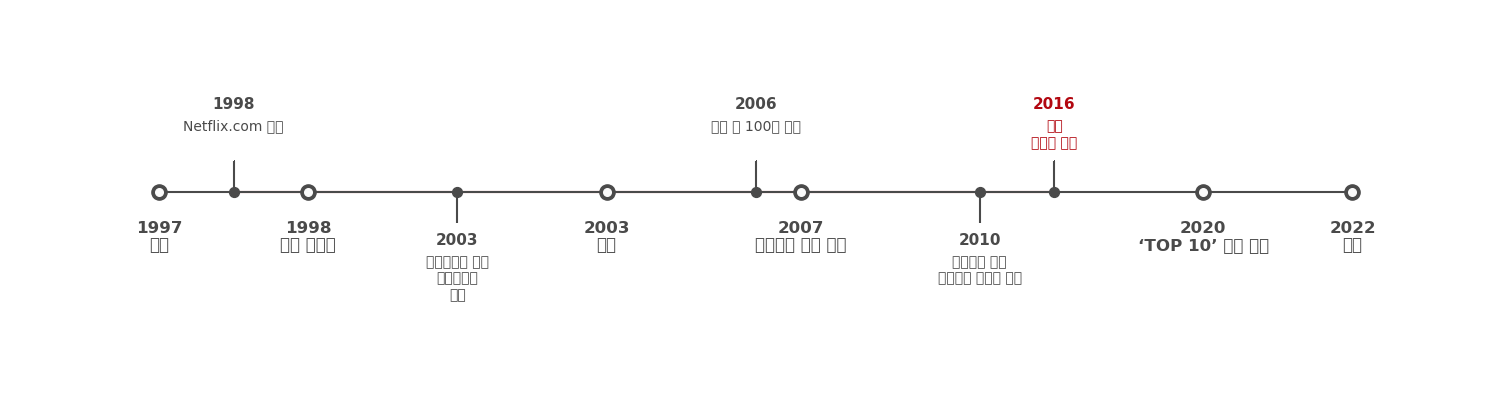

In [17]:
# 넷플릭스 연대기 plot

# import lib
from datetime import datetime

# 밑에 있는 글자들
lower_dates = [
    "1997\n설립",
    "1998\n메일 서비스",
    "2003\n공개",
    "2007\n스트리밍 기능 도입",
    "2020\n‘TOP 10’ 목록 론칭",
    "2022\n현재"
]

lower = [1, 2, 4, 5.3, 8,9]

# 위에 있는 글자들
upper = [1.5,3,5,6.5,7]


upper_times = [
    "1998","2003","2006","2010","2016"
]

upper_text = [
    "Netflix.com 론칭",
    "개인취향에 따른\n추천시스템\n도입","회원 수 100만 돌파","아이들을 위한\n스트리밍 서비스 시작","한국\n서비스 시작"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline - line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline - Date Points
ax.scatter(lower, np.zeros(len(lower)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(lower, np.zeros(len(lower)), s=30, c='#fafafa', zorder=3)
# Timeline - Time Points
ax.scatter(upper, np.zeros(len(upper)), s=50, c='#4a4a4a',zorder=5)

# Date Text
for x, date in zip(lower, lower_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='AppleGothic', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    

# Stemplot : vertical line
levels = np.zeros(len(upper))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(upper, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(upper)+1), upper, upper_times, upper_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='AppleGothic', fontweight='bold',
            color='#4a4a4a' if idx!=len(upper) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='AppleGothic',color='#4a4a4a' if idx!=len(upper) else '#b20710')



# 동그라미
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 


plt.show()

## 넷플릭스 등록 수 증가 분포
- 우선 추가된 날짜 데이터와 기존 데이터를 merge 해줌


In [18]:
# 넷플릭스 콘텐츠 추가 분포를 알기 위해 필요한 데이터 불러오기
nf_date = pd.read_csv('./netflix_date_added.csv', encoding='utf-8')

In [19]:
# 필요한 열 한글로 변경
nf_date.rename(columns = {'date_added' : '추가날짜', 'title' : '제목'},inplace=True)

In [20]:
# nf 데이터, nf_date 데이터 제목 기준으로 결합
merge = pd.merge(nf, nf_date, how='outer', on='제목')

In [21]:
# mrege '추가날짜' 열을 nf 새 열에 저장
nf['추가날짜'] = merge['추가날짜']

In [22]:
nf.head()

,제목,종류,출시연도,시청등급,재생시간,카테고리,출시국가,imdb평점,tmdb평점,추가날짜
0,Five Came Back: The Reference Films,TV Show,1945,TV-MA,48,[documentation],US,No Data,No Data,NaN
1,Taxi Driver,Movie,1976,R,113,"[crime, drama]",US,8.3,8.2,"April 1, 2020"
2,Monty Python and the Holy Grail,Movie,1975,PG,91,"[comedy, fantasy]",GB,8.2,7.8,"April 1, 2020"
3,Life of Brian,Movie,1979,R,94,[comedy],GB,8.0,7.8,"January 2, 2019"
4,The Exorcist,Movie,1973,R,133,[horror],US,8.1,7.7,NaN


In [23]:
# 추가날짜 결측치 확인
nf.isna().sum()

제목           0
종류           0
출시연도         0
시청등급         0
재생시간         0
카테고리         0
출시국가         0
imdb평점       0
tmdb평점       0
추가날짜      2296
dtype: int64

In [24]:
# nf 데이터 nf_add로 복사
nf_add = nf.copy()

In [25]:
# nf_add 데이터 결측값 제거
nf_add.dropna(axis = 0, how = 'any', subset = ['추가날짜'],inplace=True)

In [26]:
# 추가날짜 열 datetime으로 변환 후 연도와 월별 구분지어 새로운 열에 저장
nf_add['추가날짜'] = pd.to_datetime(nf_add['추가날짜'])
nf_add['추가년도'] = nf_add['추가날짜'].dt.year
nf_add['추가월별'] = nf_add['추가날짜'].dt.month

In [27]:
sns.set_style("white")
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
# windows matplotlib 한글 폰트 오류 문제 해결
font_path = "C:/Windows/Fonts/malgun.ttf" # 폰트 파일 
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# minus 관련 warning
plt.rcParams['axes.unicode_minus'] = False
# mac os 용 한글 폰트 오류 해결
# rc("font",family = "AppleGothic")

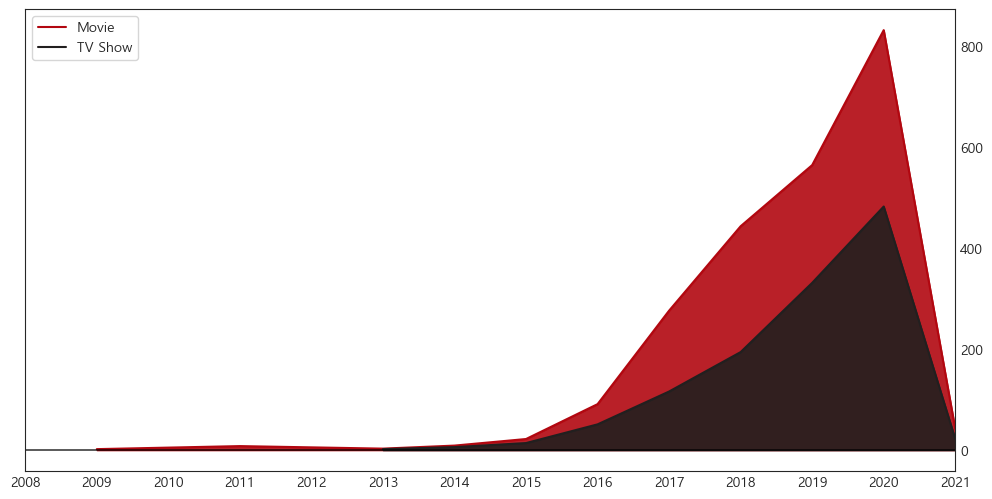

In [28]:
# 그래프 객체 설정, color 설정
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

# 그래프 위 값 표시
for i, mtv in enumerate(nf_add['종류'].value_counts().index):
    mtv_rel = nf_add[nf_add['종류']==mtv]['추가년도'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

# y축 오른쪽에 표시    
ax.yaxis.tick_right()

# 수평선 설정
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# x축 범위 설정
ax.set_xlim(2008,2021)
plt.xticks(np.arange(2008, 2022, 1))

# 그래프 범례
plt.legend()

# 축 눈금 수정
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Movies & TV shows 비율 구하기

In [29]:
# Movies & TV Shows 비율 계산
x = nf.groupby(["종류"])["종류"].count()
y = len(nf)
r = ((x/y)).round(2)

# 전치
nf_ratio = pd.DataFrame(r).T

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


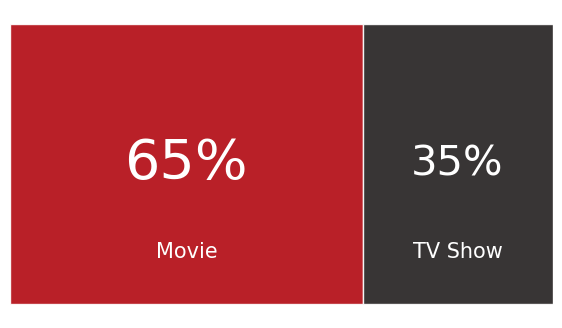

In [30]:
# 그래프 객체 생성 (바 그래프 두개를 그려 합쳐 넣기 위함 )
fig, ax = plt.subplots(1,1,figsize=(7, 4))

# bar 그래프 그리기
ax.barh(nf_ratio.index, nf_ratio['Movie'], 
        color='#b20710', alpha=0.9)
ax.barh(nf_ratio.index, nf_ratio['TV Show'], left=nf_ratio['Movie'], 
        color='#221f1f', alpha=0.9)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])


# Movies의 비율 (%)
for i in nf_ratio.index:
    ax.annotate(f"{int(nf_ratio['Movie'][i] * 100)}%", # 백분율로 나타내기위해 x100
                    # 글자 꾸미기, 위치 조정
                   xy = (nf_ratio['Movie'][i] / 2, i), 
                   va = 'center', ha = 'center',fontsize = 40, fontweight = 'light', fontfamily = 'AppleGothic',
                   color='white')

    ax.annotate("Movie", 
                   xy = (nf_ratio['Movie'][i] / 2, -0.25),# 글자 위치선정 
                   va = 'center', ha = 'center',fontsize = 15, fontweight = 'light', fontfamily = 'AppleGothic',
                   color='white')
    
# TV Show의 비율(%)
for i in nf_ratio.index:
    ax.annotate(f"{int(nf_ratio['TV Show'][i] * 100)}%", 
                   xy = (nf_ratio['Movie'][i] + nf_ratio['TV Show'][i] / 2, i),
                   va = 'center', ha ='center',fontsize = 30, fontweight = 'light', fontfamily = 'AppleGothic',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(nf_ratio['Movie'][i]+nf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha = 'center',fontsize = 15, fontweight = 'light', fontfamily  ='AppleGothic',
                   color='white')

# 여백 삭제
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

plt.show()

## Top 10 countries on Netflix

In [31]:
# 출시국가 공백값 존재, 이를 제거하여 nf_country 변수 생성
nf_country = nf[(nf["출시국가"] != "")]

In [32]:
nf_country['출시국가'].unique()

array(['US', 'GB', 'US, GB', 'JP', 'EG', 'DE', 'IN', 'DZ, EG', 'LB',
       'FR, LB, CA', 'IN, SU', 'US, IT', 'HK, US', 'GB, US', 'AR', 'KW',
       'EG, FR', 'FR, LB', 'US, JP', 'US, CA', 'DE, US', 'US, DE',
       'CA, US', 'US, FR', 'PE, US, BR', 'IT, US, FR', 'US, HK',
       'FR, IE, GB, DE', 'GH, GB, US, BF, DE', 'AR, ES', 'FR', 'MX', 'AU',
       'CO', 'BE, FR, NO, LB', 'IT, LB, BE, FR', 'US, FR, DE, PS', 'TR',
       'CA', 'GB, US, BS, CZ, DE', 'GB, US, AU', 'DE, ES, US, FR',
       'GB, US, AU, DE', 'JP, US', 'US, IS, GB', 'DK', 'NZ, JP, US',
       'US, CA, FR', 'GB, US, DE', 'US, DE, IT, GB', 'CA, DE, US',
       'HK, CN', 'IT, US', 'FR, JP, US', 'US, BE', 'KR', 'IT',
       'BG, GB, US', 'US, AU', 'ES, GB', 'GB, US, JP', 'CN, HK', 'RU',
       'CN', 'SG', 'GB, US, CA', 'HK, JP', 'CA, GB, US', 'ES, FR, MX',
       'IN, CA, US', 'PS, FR, MA, DE', 'HK', 'DE, UY, ES, AR', 'ES, AR',
       'US, IN', 'TW', 'IN, US', 'MY', 'ES, CH, PS, BE, FR', 'CL, AR',
       'DE, KW, PS, FR', '

In [33]:
# 주요 국가 이름 변경
countries = {
    'US' : 'USA',
    'IN' : 'IND',
    'GB' : 'UK',
    'JP' : 'JPN',
    'KR' : 'KOR',
    'ES' : 'ESP', 
    'FR' : 'FRA',
    'CA' : 'CAN',
    'MX' : 'MEX',
    'BR' : 'BRA',
    'CN' : 'CHN',
    'AU' : 'AUS'
}

In [34]:
# nf_country 새 열인 '국가'열에 주요 국가이름 변경 값을 저장
nf_country['국가'] = nf_country['출시국가'].replace(countries)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


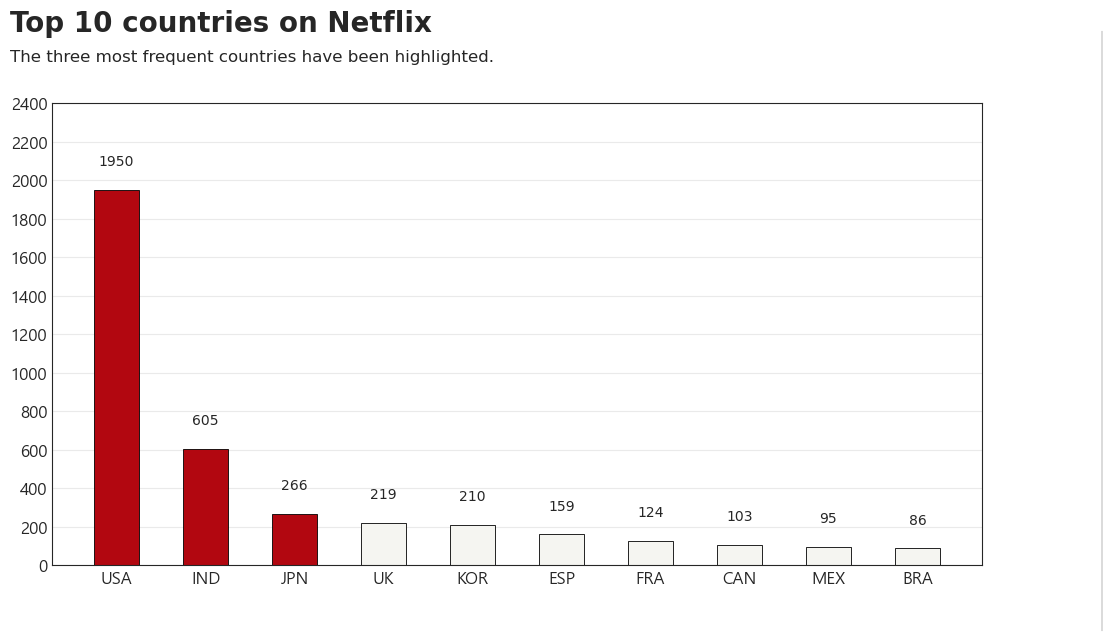

In [35]:
# 보조 컬럼 생성 
nf_country['count'] = 1
# Top10 안에 드는 국가들을 내림차 순으로 정렬
data = nf_country.groupby('국가')['count'].sum().sort_values(ascending=False)[:10]

# 상위 3개 국가 color 하이라이트
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # 상위 3개 국가 color 하이라이트

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='black',
       linewidth=0.6,color=color_map)

# 막대 바 위에 숫자 달아주기
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150),
                   va = 'center', ha='center',fontweight='light', fontfamily='AppleGothic')


# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=20, fontweight='bold', fontfamily='AppleGothic')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='AppleGothic')


# 격자선 그리기

ax.grid(axis='y', linestyle='-', alpha=0.4)   

# y ticks, min, max, 얼마나 건너 뛸 지
grid_y_ticks = np.arange(0, 2600, 200) 
ax.set_yticks(grid_y_ticks)

# tick 설정
ax.tick_params(axis='both', which='both', labelsize=12)

# 선 그리기
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

# tick 설정
ax.tick_params(axis='both', which='major',length=0)

plt.show()

## Top10 국가 Movie / TV Show 비율

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


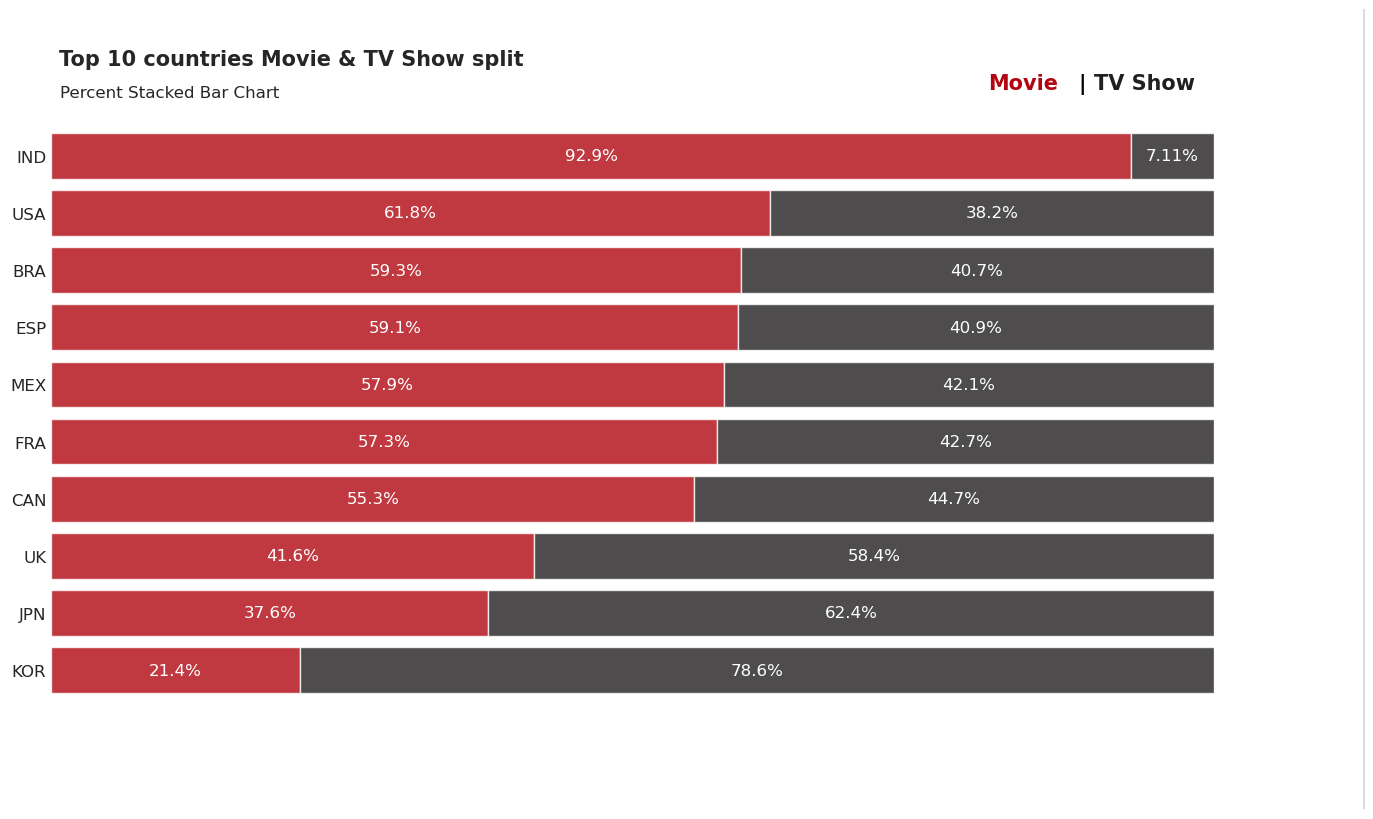

In [36]:

country_order = nf_country['국가'].value_counts()[:10].index
top_country = nf_country[['종류', '국가']].groupby('국가')['종류'].value_counts().unstack().loc[country_order]
top_country['sum'] = top_country.sum(axis=1)
top_counry_ratio = (top_country.T / top_country['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]


# 그래프 객체 설정, 수평 막대그래프 그리기
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(top_counry_ratio.index, top_counry_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(top_counry_ratio.index, top_counry_ratio['TV Show'], left=top_counry_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


# x축, y축 눈금 설정
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(top_counry_ratio.index, fontfamily='AppleGothic', fontsize=11)

# 그래프 위 값 표시
for i in top_counry_ratio.index:
    ax.annotate(f"{top_counry_ratio['Movie'][i]*100:.3}%", 
                   xy=(top_counry_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='AppleGothic',
                   color='white')

# 그래프 위 값 표시
for i in top_counry_ratio.index:
    ax.annotate(f"{top_counry_ratio['TV Show'][i]*100:.3}%", 
                   xy=(top_counry_ratio['Movie'][i]+top_counry_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='AppleGothic',
                   color='white')
    
# 제목 설정
fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='AppleGothic')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='AppleGothic')   

# 여백 제거
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
# 그래프 분류 설명 삽입
fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='AppleGothic', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='AppleGothic', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='AppleGothic', fontsize=15, color='#221f1f')

# 그래프 조정
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

# 그래프 눈금 설정
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## 국가별 Movie/Tv Show 분포수 

In [37]:
# '국가' 열 데이터 수정
nf_country['국가'] = nf_country['국가'].apply(lambda x: x.split(",")[0])

In [38]:
# 종류별 국가 컨텐츠 수 그룹화
grp_nf = nf_country[['종류','국가','제목']].groupby(['종류','국가']).count()
grp_nf.head()

제목
종류    국가    
Movie AE  14
      AF   2
      AO   1
      AR  42
      AT   6

In [39]:
# 피벗 테이블
nat_pivot = pd.pivot_table(data=grp_nf, index = '국가', columns = '종류', values = '제목' )

In [40]:
# TV Show 기준 오름차순
nat_pivot_10 = nat_pivot.sort_values(by = 'TV Show',ascending=False)[:10]

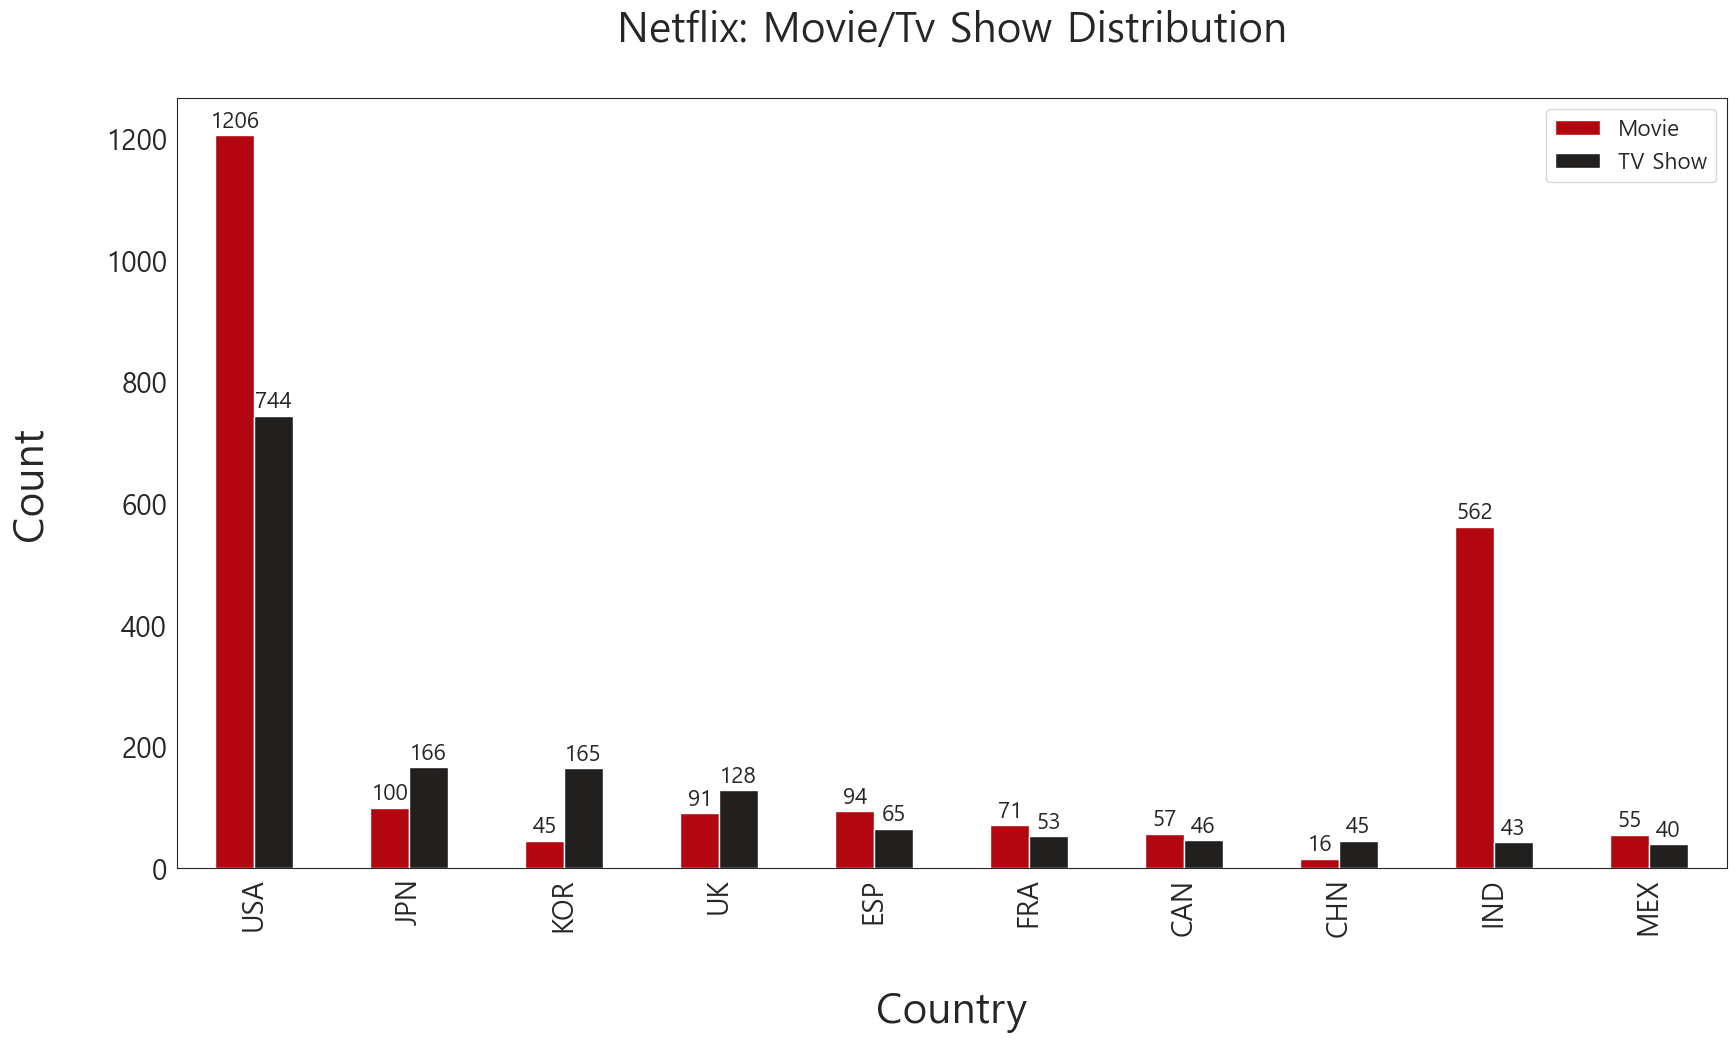

In [41]:
# 막대그래프 그리기
ax = nat_pivot_10.plot(kind='bar', fontsize=15, figsize=(20,10),
                       ylabel = 'Count', color = ['#b20710','#221f1f'])
# 그래프 위 값 표시
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., 
                p.get_height()), ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=16)
# 그래프 설정    
ax.set_title('Netflix: Movie/Tv Show Distribution\n ', fontsize=30)
ax.set_xlabel('\nCountry', fontsize=30, rotation=0)
ax.set_ylabel('Count\n', fontsize=30)
ax.tick_params(axis='x', labelsize=20, rotation=90)
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize = 16)

## 시청등급별 Movie/Tv Show 비율

In [42]:
# '시청등급' 정렬
nf['count'] = 1
order = pd.DataFrame(nf.groupby('시청등급')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['시청등급'])

In [43]:
nf['시청등급'].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', 'No Data', 'TV-PG',
       'TV-Y', 'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [44]:
rating_order

['No Data',
 'TV-MA',
 'R',
 'TV-14',
 'PG-13',
 'PG',
 'TV-PG',
 'G',
 'TV-Y7',
 'TV-Y',
 'TV-G',
 'NC-17']

In [45]:
# 'No Data : ALL' 추가
# 시청등급을 Kids, Older Kids, Teens, Adults 4가지로 분류
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults',
    'No Data' : 'ALL'
}

nf['시청등급'] = nf['시청등급'].replace(ratings_ages)
nf['시청등급'].unique()

array(['Adults', 'Older Kids', 'Teens', 'Kids', 'ALL'], dtype=object)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


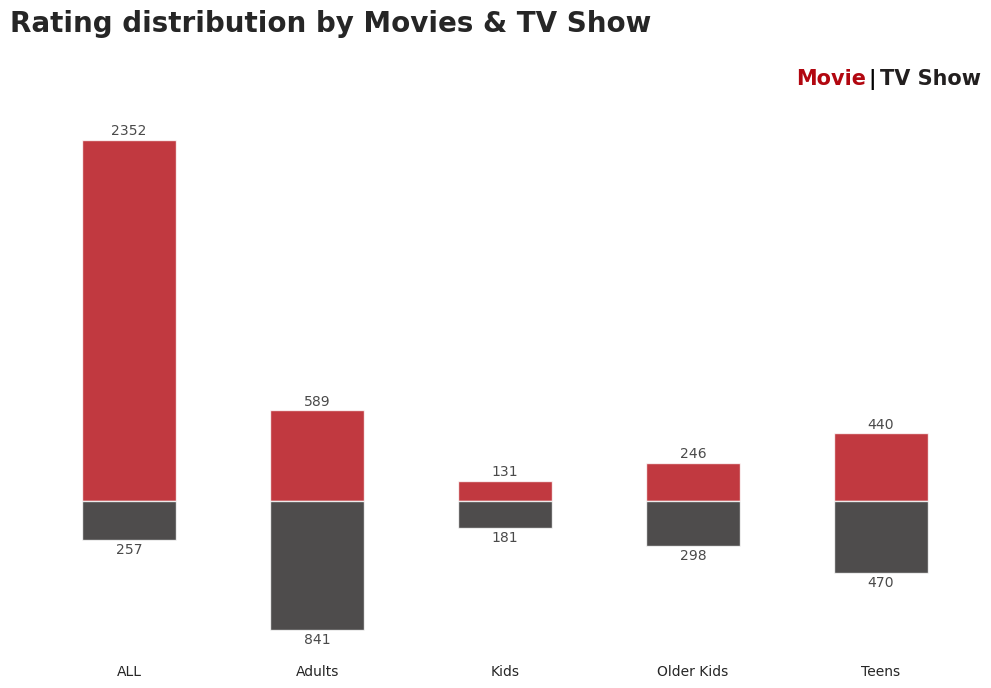

In [46]:
# 종류별 시청등급 수 정렬
sort_movie_tv = nf.groupby('종류')['시청등급'].value_counts().unstack().sort_index().fillna(0).astype(int)

movie = sort_movie_tv.loc['Movie']
tv = - sort_movie_tv.loc['TV Show']

# 그래프 그리기
fig, ax = plt.subplots(1,1, figsize=(12, 7))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# 그래프 위 데이터 값 입력
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='AppleGothic',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='AppleGothic',
                   color='#4a4a4a')

# 여백 제거    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# 그래프 설정
ax.set_xticklabels(sort_movie_tv.columns, fontfamily='AppleGothic')
ax.set_yticks([])    

# 그래프 제목, 범례 설정
ax.legend().set_visible(False)
fig.text(0.1, 1, 'Rating distribution by Movies & TV Show', fontsize=20, fontweight='bold', fontfamily='AppleGothic')

fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='AppleGothic', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='AppleGothic', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='AppleGothic', fontsize=15, color='#221f1f')

plt.show()

## Netflix 상관계수 히트맵
- 재생시간과 출시연도가 평점에 영향을 끼칠까 ? 
- 서로 다른 사이트간의 평점들이 상관관계가 있을까 ? 

In [47]:
score_nf = nf[(nf["imdb평점"] != "No Data") & (nf["tmdb평점"] != "No Data")]
score_nf = score_nf.astype({"imdb평점": float , "tmdb평점": float})
score_nf_movie = score_nf[(score_nf["종류"] == "Movie")]
score_nf_tvshow = score_nf[(score_nf["종류"] == "TV Show")]

- count column 을 없앤 후 해야함

In [48]:
score_nf_movie.drop('count', axis = 1, inplace = True)

In [49]:
score_nf_tvshow.drop('count', axis = 1, inplace = True)

In [50]:
sns.set(font_scale = 1.3)
from matplotlib import font_manager, rc
# windows matplotlib 한글 폰트 오류 문제 해결
font_path = "C:/Windows/Fonts/malgun.ttf" # 폰트 파일 
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# minus 관련 warning
plt.rcParams['axes.unicode_minus'] = False
# mac os 용 한글 폰트 오류 해결
# rc("font",family = "AppleGothic")

##  종류별 재생시간, 출시연도, 평점 상관계수 히트맵

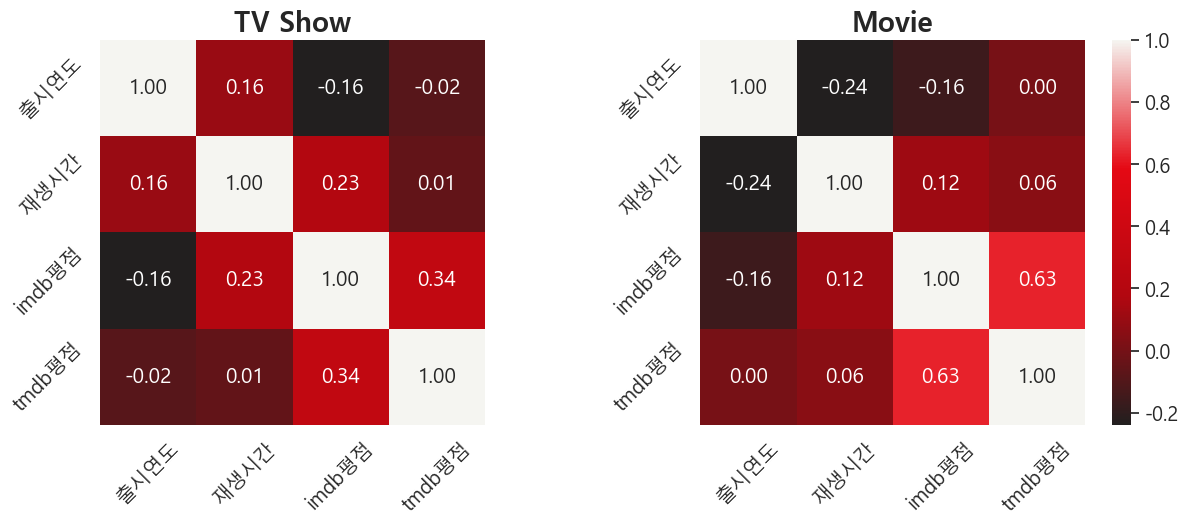

In [51]:
# import libs
from matplotlib.colors import LinearSegmentedColormap

# 색 지정
colors = ['#221f1f', '#b20710', '#e50914', '#f5f5f1']
cmap = LinearSegmentedColormap.from_list('my_cmap',colors , gamma = 1)

# 그래프 객체 생성
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 상관계수 구하기
score_nf_tv_corr = score_nf_tvshow.corr()
score_nf_movie_corr = score_nf_movie.corr()

# 그래프 출력을 위해 컬럼명 축약
cols_label = ["출시연도", "재생시간", "imdb평점", "tmdb평점"]

# Movie 히트맵 그리기
tv_heatmap = sns.heatmap(score_nf_tv_corr.values, cbar = False, 
                 annot = True, square = True,
                 fmt = ".2f", annot_kws = {"size": 15},
                 ax = ax1, cmap = cmap)
ax1.set_title("TV Show", size = 20, fontweight = "bold")

# 글자 각도 틀기
ax1.set_yticklabels(cols_label, rotation = 45)
ax1.set_xticklabels(cols_label, rotation = 45)

# TV Show 히트맵 그리기
movie_heatmap = sns.heatmap(score_nf_movie_corr.values, cbar = True, 
                 annot = True, square = True,
                 fmt = ".2f", annot_kws = {"size": 15},
                 ax = ax2, cmap = cmap)
ax2.set_title("Movie", size = 20, fontweight = "bold")

# 글자 각도 틀기
ax2.set_yticklabels(cols_label, rotation = 45)
ax2.set_xticklabels(cols_label, rotation = 45)

plt.show()

## Netflix 제목 워드 클라우드

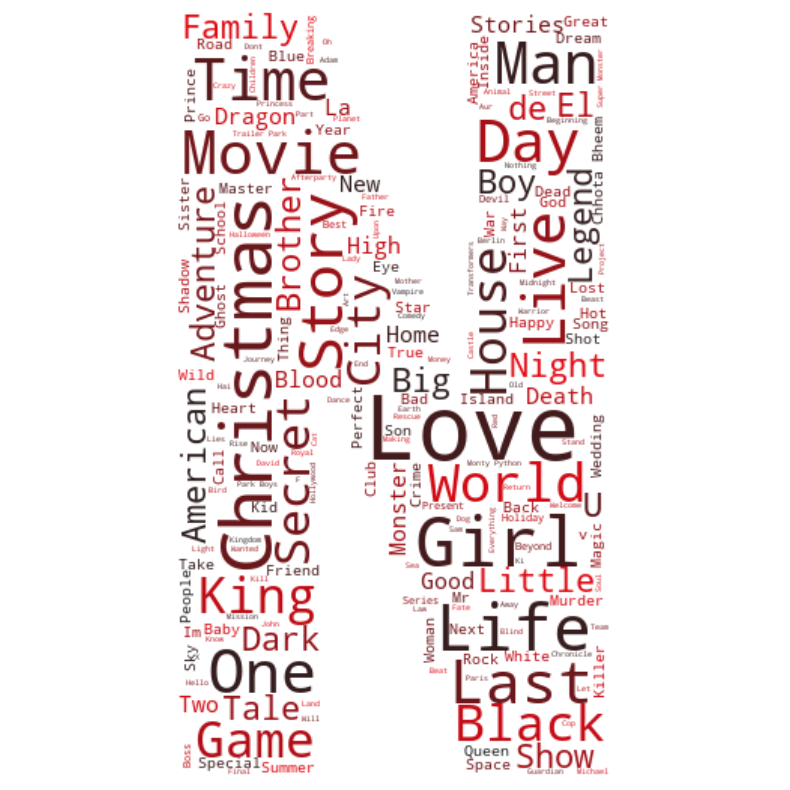

In [52]:
# Netflix 제목에 가장 많이 사용된 단어 보기

# import lib
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# 컬러맵 설정
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#e50914'])

# 텍스트 설정 (Movie,TV Show의 제목으로 설정함)
text = str(list(nf['제목'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

# netflix 로고 모양 워드 클라우드 생성 하기위해 불러옴
mask = np.array(Image.open("./netflix.png"))

# 워드클라우드 그리기
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, colormap=cmap, max_words = 200, mask = mask).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')# interpolation = 'bilinear' 이미지를 부드럽게 보여주는 옵션
plt.axis('off') # axis 제거
plt.show()

## 장르간 상관계수 히트맵

In [53]:
# 다중레벨이진화 = 장르 분류 
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib.colors


# 컬러맵
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f1', '#e50914', '#b20710', '#221f1f'])

# 히트맵 함수 
def genre_heatmap(nf, title):
    Types = []
    for i in nf["카테고리"]: Types += i
    Types = set(Types)    
    
    test = nf["카테고리"]
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax= plt.subplots(figsize=(15, 10))

    pl = sns.heatmap(corr, mask=mask,
                     cmap=cmap, vmax=.4,
                     vmin=-.4, center=0,
                     square=True, linewidths=2.5)

    plt.show()

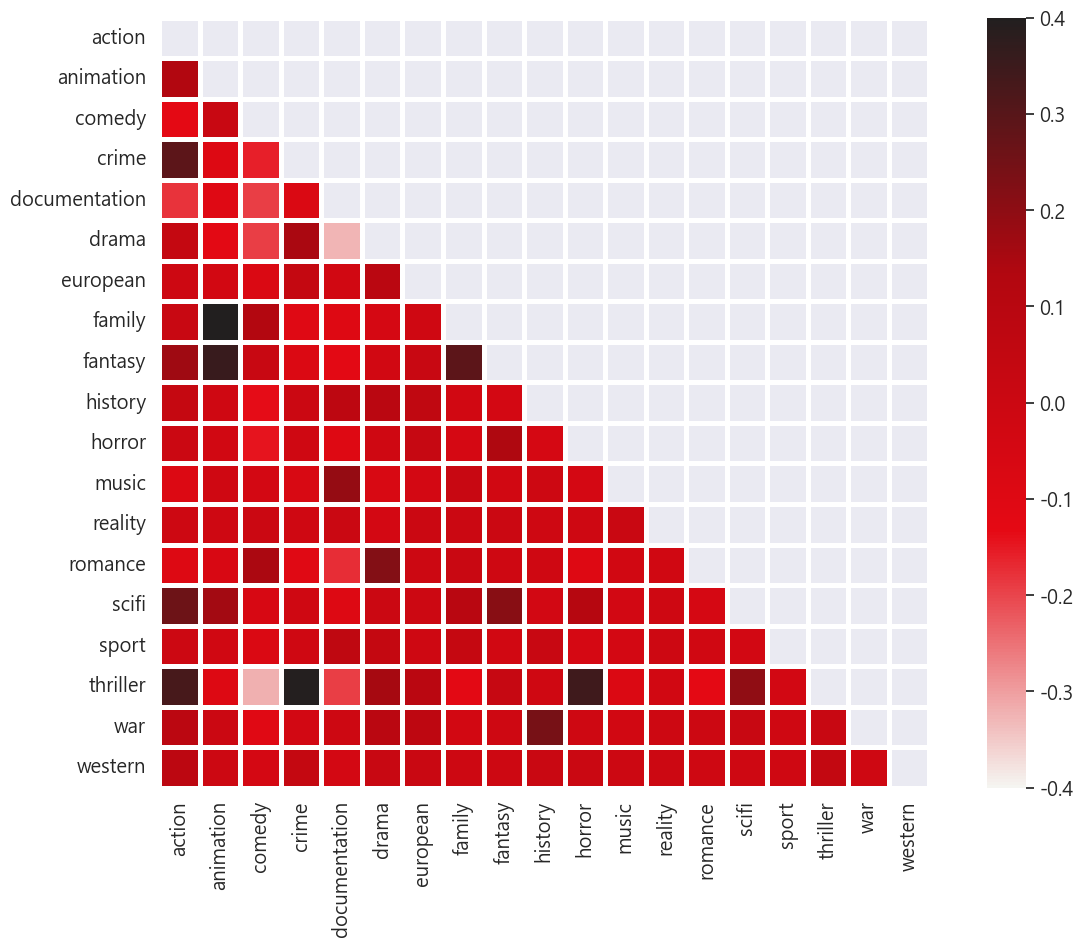

In [54]:
# 히트맵 for movie
# 색이 진할수록 상관관계가 높음 
# 장르간의 상관계수
nf_tv = nf[nf["종류"] == "TV Show"]
nf_movies = nf[nf["종류"] == "Movie"]

genre_heatmap(nf_movies, "Movie")

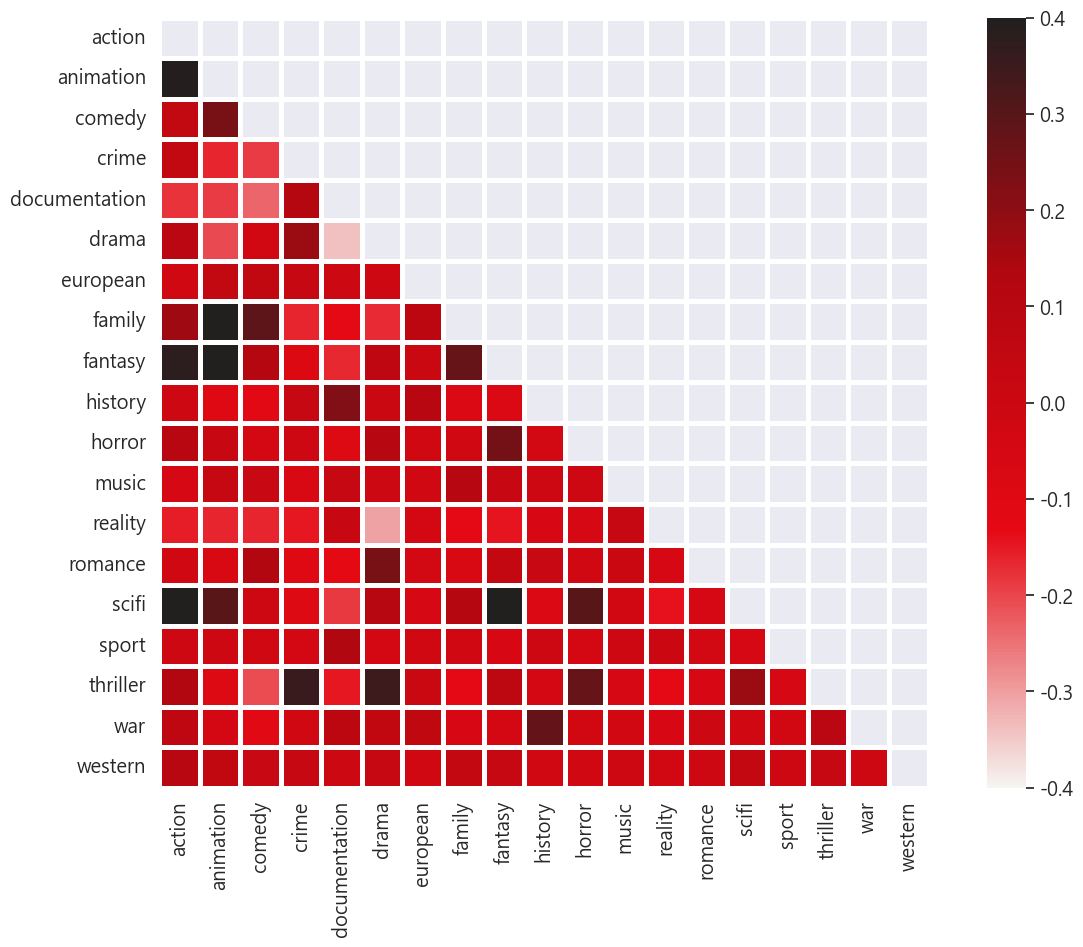

In [55]:
# 히트맵 for TV_Show
nf_tv = nf[nf["종류"] == "TV Show"]
nf_movies = nf[nf["종류"] == "Movie"]

genre_heatmap(nf_tv, "TV Show")

## 카테고리별 평점 / 갯수 데이터프레임 생성

In [56]:
score_nf.reset_index(inplace = True, drop = True)

In [57]:
# 카테고리 분류 리스트 생성
ca_list = []

# 카테고리 분류
for idx in nf["카테고리"]:
    for i in idx:
        ca_list.append(i)

# 중복 값 제거        
ca_list = set(ca_list)
ca_list = list(ca_list)
    
# 카테고리별 imdb평점 리스트 생성    
category_list_imdb= {}
for i in ca_list:
    category_list_imdb.setdefault(i, [])
    
# 카테고리별 tmdb평점 리스트 생성    
category_list_tmdb = {}
for i in ca_list:
    category_list_tmdb.setdefault(i, [])

In [58]:
# 카테고리별 imdb평점 분류
for idx in range(0, len(score_nf)):
    for category in score_nf["카테고리"][idx]:
        category_list_imdb[category].append(score_nf["imdb평점"][idx])
        
# 카테고리별 tmdb평점 분류        
for idx in range(0, len(score_nf)):
    for category in score_nf["카테고리"][idx]:
        category_list_tmdb[category].append(score_nf["tmdb평점"][idx])

In [59]:
# 사이트, 카테고리별 (평균, 최고, 최하점수), 컨텐츠 갯수 분류
imdb_score_mean = []
tmdb_score_mean = []
imdb_score_max = []
tmdb_score_max = []
imdb_score_min = []
tmdb_score_min = []
category_count = []
for i in ca_list:
    imdb_score_mean.append(round(np.mean(category_list_imdb[i]), 2))
    tmdb_score_mean.append(round(np.mean(category_list_tmdb[i]), 2))
    imdb_score_max.append(np.max(category_list_imdb[i]))
    tmdb_score_max.append(np.max(category_list_tmdb[i]))
    imdb_score_min.append(np.min(category_list_imdb[i]))
    tmdb_score_min.append(np.min(category_list_tmdb[i]))
    category_count.append(len(category_list_imdb[i]))

In [60]:
# 분류 데이터 딕셔너리 생성
score_data = {"카테고리": ca_list, "imdb평균점수": imdb_score_mean,
              "tmdb평균점수": tmdb_score_mean, "imdb최고점수": imdb_score_max,
              "tmdb최고점수": tmdb_score_max, "imdb최하점수": imdb_score_min,
              "tmdb최하점수": tmdb_score_min, "갯수": category_count}

In [61]:
# 데이터 프레임 생성
category_score = pd.DataFrame(score_data)
category_score

,카테고리,imdb평균점수,tmdb평균점수,imdb최고점수,tmdb최고점수,imdb최하점수,tmdb최하점수,갯수
0,scifi,6.60,7.14,9.3,10.0,2.5,2.9,544
1,crime,6.69,6.79,9.5,10.0,2.1,2.8,858
2,documentation,7.04,7.07,9.3,10.0,2.3,2.8,789
3,animation,6.72,7.34,9.3,10.0,1.7,1.0,576
4,sport,6.71,7.00,9.1,9.2,1.8,2.0,163
5,western,6.60,6.76,8.9,8.7,3.4,3.3,41
6,action,6.47,6.83,9.3,10.0,1.7,1.0,988
7,family,6.33,7.19,9.3,10.0,1.7,2.0,586
8,music,6.67,7.09,8.8,10.0,1.7,3.3,213
9,european,6.53,6.60,8.9,9.3,1.7,2.0,439


In [62]:
category_score.corr()

,imdb평균점수,tmdb평균점수,imdb최고점수,tmdb최고점수,imdb최하점수,tmdb최하점수,갯수
imdb평균점수,1.000000,0.513510,-0.135066,-0.249144,0.471522,0.518678,-0.154567
tmdb평균점수,0.513510,1.000000,-0.063847,0.167950,0.097071,0.025746,-0.274133
imdb최고점수,-0.135066,-0.063847,1.000000,0.588270,-0.455597,-0.442445,0.669429
tmdb최고점수,-0.249144,0.167950,0.588270,1.000000,-0.512129,-0.383857,0.414628
imdb최하점수,0.471522,0.097071,-0.455597,-0.512129,1.000000,0.776944,-0.491396
tmdb최하점수,0.518678,0.025746,-0.442445,-0.383857,0.776944,1.000000,-0.528858
갯수,-0.154567,-0.274133,0.669429,0.414628,-0.491396,-0.528858,1.000000


In [63]:
category_score.sort_values(by = "갯수", ascending = False, inplace = True)

## 사이트별 카테고리 평균, 최고, 최하 점수 / 컨텐츠 갯수 3d 산점도 그래프

In [64]:
# Importing libs
import plotly.express as px
# 3d 산점도 그래프 생성
fig = px.scatter_3d(category_score,
                    x = "tmdb평균점수", y = "tmdb최하점수", z = "tmdb최고점수",
                    color = "카테고리", size = "갯수", size_max = 100, opacity = 0.7)

# 레이아웃 설정
fig.update_layout(title = "카테고리별 tmdb점수",
                  titlefont = dict({"size":28, "family": "AppleGothic"}),
                  template = "plotly_dark",
                  paper_bgcolor = "black",
                  width=750, height=550)
fig.update_layout(scene = dict(
                    xaxis = dict(
                         gridcolor = "#e50914",
                         showbackground = True,
                         zerolinecolor = "black",),
                    yaxis = dict(
                        gridcolor = "#e50914",
                        showbackground = True,
                        zerolinecolor = "black"),
                    zaxis = dict(
                        gridcolor = "#e50914",
                        showbackground = True,
                        zerolinecolor = "black")))
fig.show()

In [65]:
import plotly.express as px
fig = px.scatter_3d(category_score,
                    x = "imdb평균점수", y = "imdb최하점수", z = "imdb최고점수",
                    color = "카테고리", size = "갯수", size_max = 100, opacity = 0.7)
fig.update_layout(title = "카테고리별 imdb점수",
                  titlefont = dict({"size":28, "family": "AppleGothic"}),
                  template = "plotly_dark",
                  paper_bgcolor = "black",
                  width=750, height=550)
fig.update_layout(scene = dict(
                    xaxis = dict(
                         gridcolor = "#e50914",
                         showbackground = True,
                         zerolinecolor="black",),
                    yaxis = dict(
                        gridcolor = "#e50914",
                        showbackground = True,
                        zerolinecolor = "black"),
                    zaxis = dict(
                        gridcolor="#e50914",
                        showbackground=True,
                        zerolinecolor="black")))

# po.write_html(fig, file = "./imdb_score.html", auto_open = False)
fig.show()

## 사이트별 카테고리 평균, 최하점수 , 컨텐츠 갯수 산점도 그래프

In [66]:
# 그래프 스타일 설정
sns.set(font_scale = 1.3)
sns.set_style("darkgrid")
# sns.set(rc = {"axes.facecolor": "#000000", "figure.facecolor": "#ffffff"})
# ['#221f1f', '#b20710', '#e50914','#f5f5f1']
plt.style.use("dark_background")
from matplotlib import rc
# windows matplotlib 한글 폰트 오류 문제 해결
font_path = "C:/Windows/Fonts/malgun.ttf" # 폰트 파일 
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# minus 관련 warning
plt.rcParams['axes.unicode_minus'] = False
# mac os 용 한글 폰트 오류 해결
# rc("font",family = "AppleGothic")

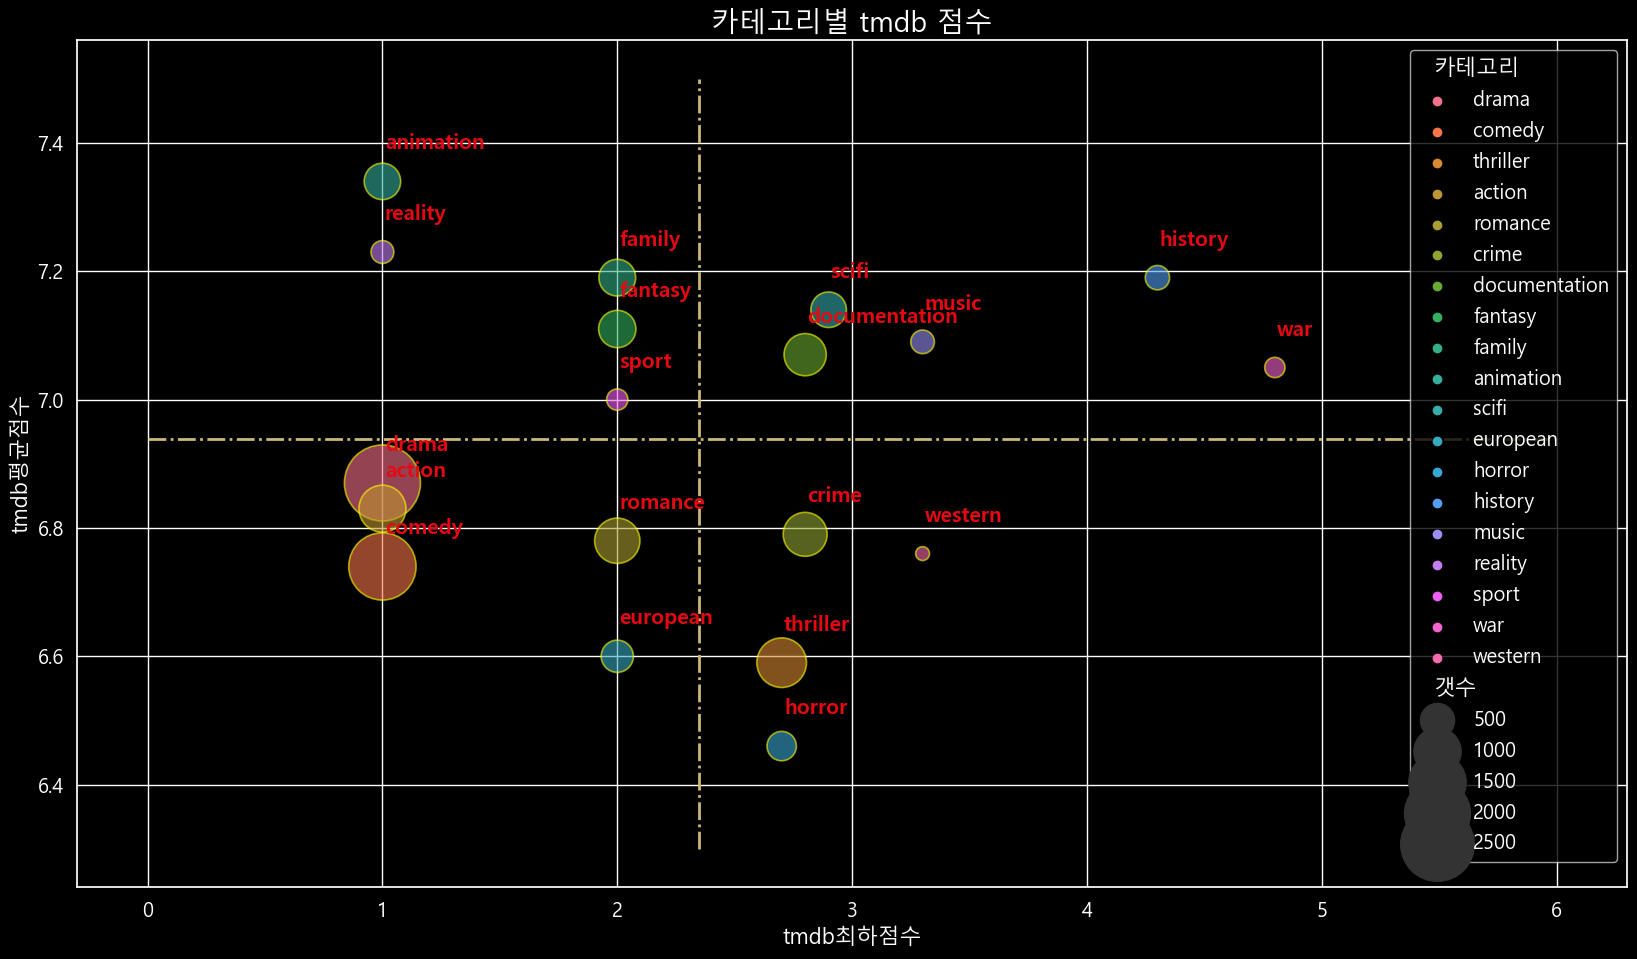

In [67]:
# 그래프 크기 설정
fig = plt.figure(figsize = (20, 11))

# 타이틀 작성
plt.title("카테고리별 tmdb 점수", size = 20)

# 산점도 그래프 생성
sns.scatterplot(x = "tmdb최하점수", y = "tmdb평균점수",
                size = "갯수", hue = "카테고리", alpha = .6, edgecolor = "yellow",
                data = category_score,
                sizes = (100, 3000), legend = True)

# x, y의 평균 라인 생성
plt.plot([0, 6],
         [category_score["tmdb평균점수"].mean(), category_score["tmdb평균점수"].mean()],
         "y-.", lw = 2)
plt.plot([category_score["tmdb최하점수"].mean(), category_score["tmdb최하점수"].mean()],
         [6.3, 7.5],
         "y-.", lw = 2)

# 카테고리별 텍스트 생성
for i in range(len(category_score)):
    plt.text(x = category_score["tmdb최하점수"][i] + .01,
             y = category_score["tmdb평균점수"][i] + .05,
             s = category_score["카테고리"][i], 
             fontdict = dict(color = "#e50914", size=15, fontweight = "bold"))

plt.show()

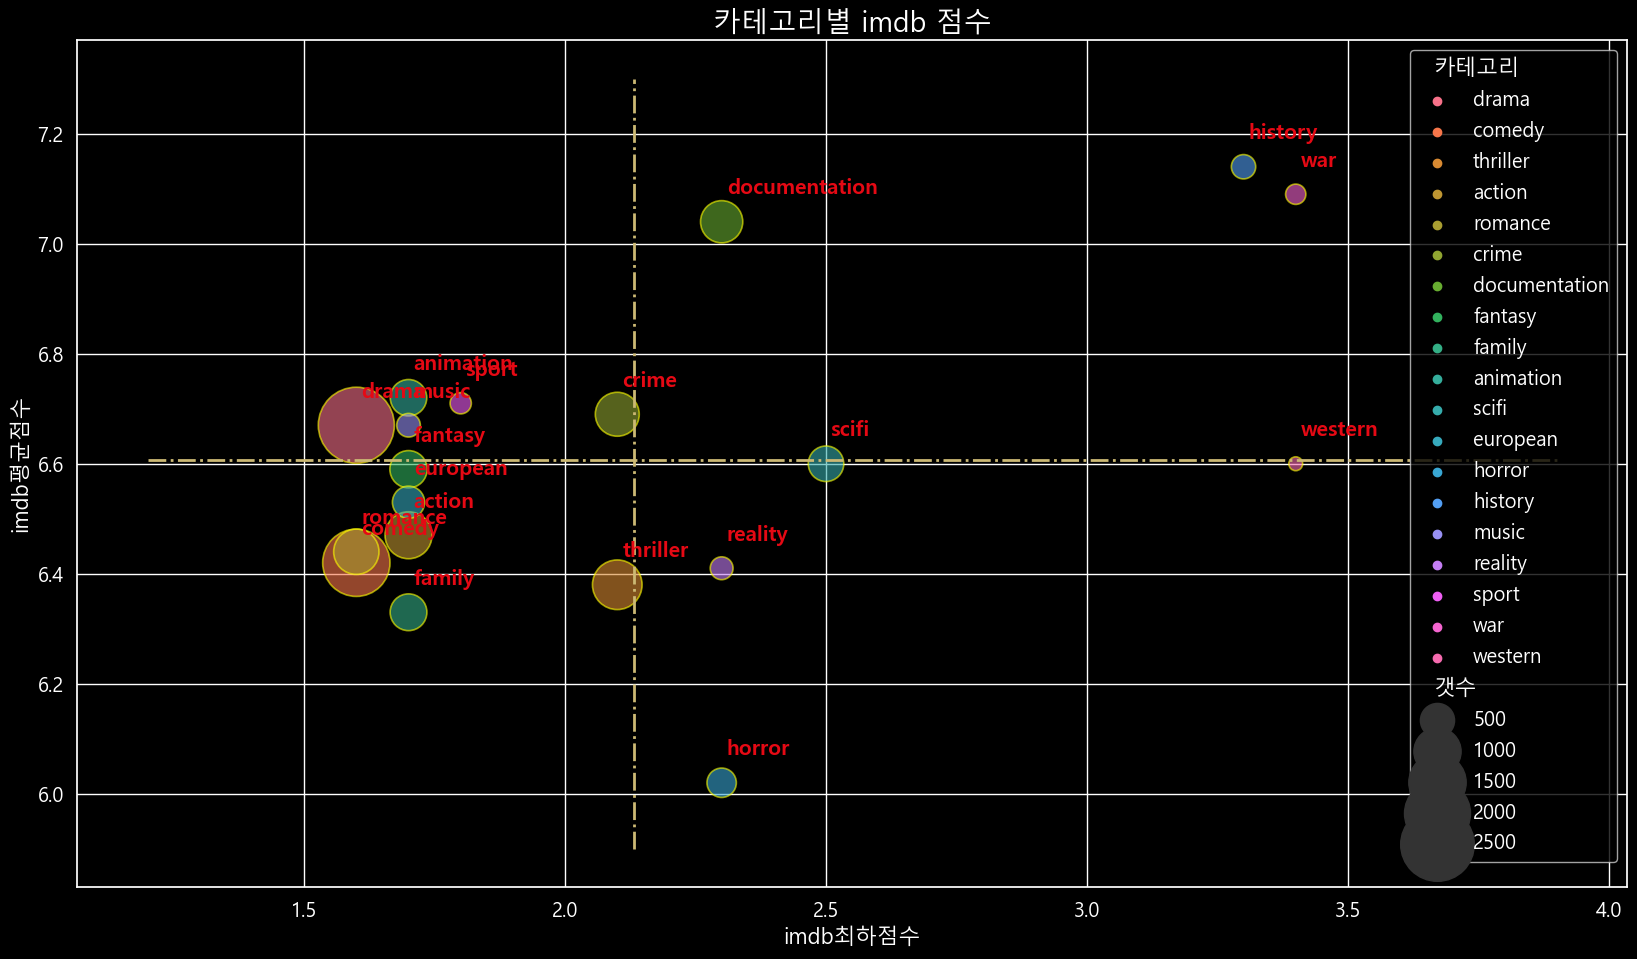

In [68]:
fig = plt.figure(figsize = (20, 11))

plt.title("카테고리별 imdb 점수", size = 20)
sns.scatterplot(x = "imdb최하점수", y = "imdb평균점수",
                size = "갯수", hue = "카테고리", alpha = .6, edgecolor = "yellow",
                data = category_score,
                sizes = (100, 3000), legend = True)

plt.plot([1.2, 3.9],
         [category_score["imdb평균점수"].mean(), category_score["imdb평균점수"].mean()],
         "y-.", lw = 2)
plt.plot([category_score["imdb최하점수"].mean(), category_score["imdb최하점수"].mean()],
         [5.9, 7.3],
         "y-.", lw = 2)

for i in range(len(category_score)):
    plt.text(x = category_score["imdb최하점수"][i] + .01,
             y = category_score["imdb평균점수"][i] + .05,
             s = category_score["카테고리"][i], 
             fontdict = dict(color = "#e50914", size=15, fontweight = "bold"))

plt.show()

In [69]:
nf_add_new = nf_add.copy()

In [70]:
nf_add_reset = nf_add.reset_index(drop = True)
category_year = {}
for category in ca_list:
    category_year.setdefault(category, {})
    for year in nf_add_new["추가년도"].unique():
        category_year[category].setdefault(year, [])
    
for idx in range(nf_add_reset.shape[0]):
    for category in nf_add_reset["카테고리"][idx]:
        category_year[category][nf_add_reset["추가년도"][idx]].append(nf_add_reset["추가년도"][idx])

for category in category_year:
    print("#" * 50)
    print(f"{category}의 연도별 추가된 컨텐츠 수")
    for year in nf_add_reset["추가년도"].unique():
        category_year[category][year] = len(category_year[category][year])
        print(f"{year}: {category_year[category][year]}")
        
contents_count = []
for category in category_year:
    contents_count.append(category_year[category])

##################################################
scifi의 연도별 추가된 컨텐츠 수
2020: 143
2019: 92
2018: 48
2021: 5
2016: 11
2017: 33
2011: 0
2014: 2
2013: 1
2015: 3
2009: 0
##################################################
crime의 연도별 추가된 컨텐츠 수
2020: 180
2019: 127
2018: 106
2021: 9
2016: 18
2017: 59
2011: 2
2014: 6
2013: 1
2015: 3
2009: 0
##################################################
documentation의 연도별 추가된 컨텐츠 수
2020: 205
2019: 161
2018: 97
2021: 8
2016: 17
2017: 63
2011: 0
2014: 0
2013: 2
2015: 4
2009: 0
##################################################
animation의 연도별 추가된 컨텐츠 수
2020: 155
2019: 104
2018: 71
2021: 9
2016: 15
2017: 40
2011: 0
2014: 2
2013: 0
2015: 5
2009: 0
##################################################
sport의 연도별 추가된 컨텐츠 수
2020: 28
2019: 24
2018: 21
2021: 1
2016: 3
2017: 8
2011: 0
2014: 1
2013: 0
2015: 1
2009: 0
##################################################
western의 연도별 추가된 컨텐츠 수
2020: 10
2019: 5
2018: 1
2021: 3
2016: 2
2017: 5
2011: 0
2014: 0
2013: 0
2015: 1
20

In [71]:
year_list = nf_add_new["추가년도"].unique()
year_list.sort()
nf_category_year = pd.DataFrame(contents_count, index = ca_list)
nf_category_year = nf_category_year[year_list]
nf_category_year

,2009,2011,2013,2014,2015,2016,2017,2018,2019,2020,2021
scifi,0,0,1,2,3,11,33,48,92,143,5
crime,0,2,1,6,3,18,59,106,127,180,9
documentation,0,0,2,0,4,17,63,97,161,205,8
animation,0,0,0,2,5,15,40,71,104,155,9
sport,0,0,0,1,1,3,8,21,24,28,1
western,0,0,0,0,1,2,5,1,5,10,3
action,1,3,1,5,6,19,72,120,154,236,15
family,0,1,1,2,7,18,42,68,89,146,4
music,0,0,1,0,1,5,15,27,35,68,2
european,0,1,0,0,3,20,53,85,72,103,7


In [72]:
# category_year = {}
# for year in nf_add_new["추가년도"].unique():
#     category_year.setdefault(year, {})
#     for category in ca_list:
#         category_year[year].setdefault(category, [])
    
# for idx in range(nf_add_reset.shape[0]):
#     for category in nf_add_reset["카테고리"][idx]:
#         category_year[nf_add_reset["추가년도"][idx]][category].append(category)

# for year in category_year:
#     print("#" * 50)
#     print(f"{year}년 추가된 컨텐츠 수")
#     for category in ca_list:
#         category_year[year][category] = len(category_year[year][category])
#         print(f"{category}: {category_year[year][category]}")

In [73]:
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager, rc
# windows matplotlib 한글 폰트 오류 문제 해결
font_path = "C:/Windows/Fonts/malgun.ttf" # 폰트 파일 
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# minus 관련 warning
plt.rcParams['axes.unicode_minus'] = False
# mac os 용 한글 폰트 오류 해결
# rc("font",family = "AppleGothic")

In [74]:
nf_category_year.T

,scifi,crime,documentation,animation,sport,western,action,family,music,european,comedy,horror,war,thriller,fantasy,drama,reality,romance,history
2009,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,0,1,0
2011,0,2,0,0,0,0,3,1,0,1,2,0,1,2,0,7,0,2,0
2013,1,1,2,0,0,0,1,1,1,0,2,1,0,1,1,0,0,0,0
2014,2,6,0,2,1,0,5,2,0,0,6,2,1,6,2,8,0,2,0
2015,3,3,4,5,1,1,6,7,1,3,21,0,0,4,4,17,1,10,0
2016,11,18,17,15,3,2,19,18,5,20,59,6,1,26,6,85,3,27,3
2017,33,59,63,40,8,5,72,42,15,53,162,22,10,80,39,200,8,61,18
2018,48,106,97,71,21,1,120,68,27,85,275,42,23,132,67,310,22,112,27
2019,92,127,161,104,24,5,154,89,35,72,363,59,19,161,98,415,33,126,35
2020,143,180,205,155,28,10,236,146,68,103,489,80,41,279,134,682,53,222,56


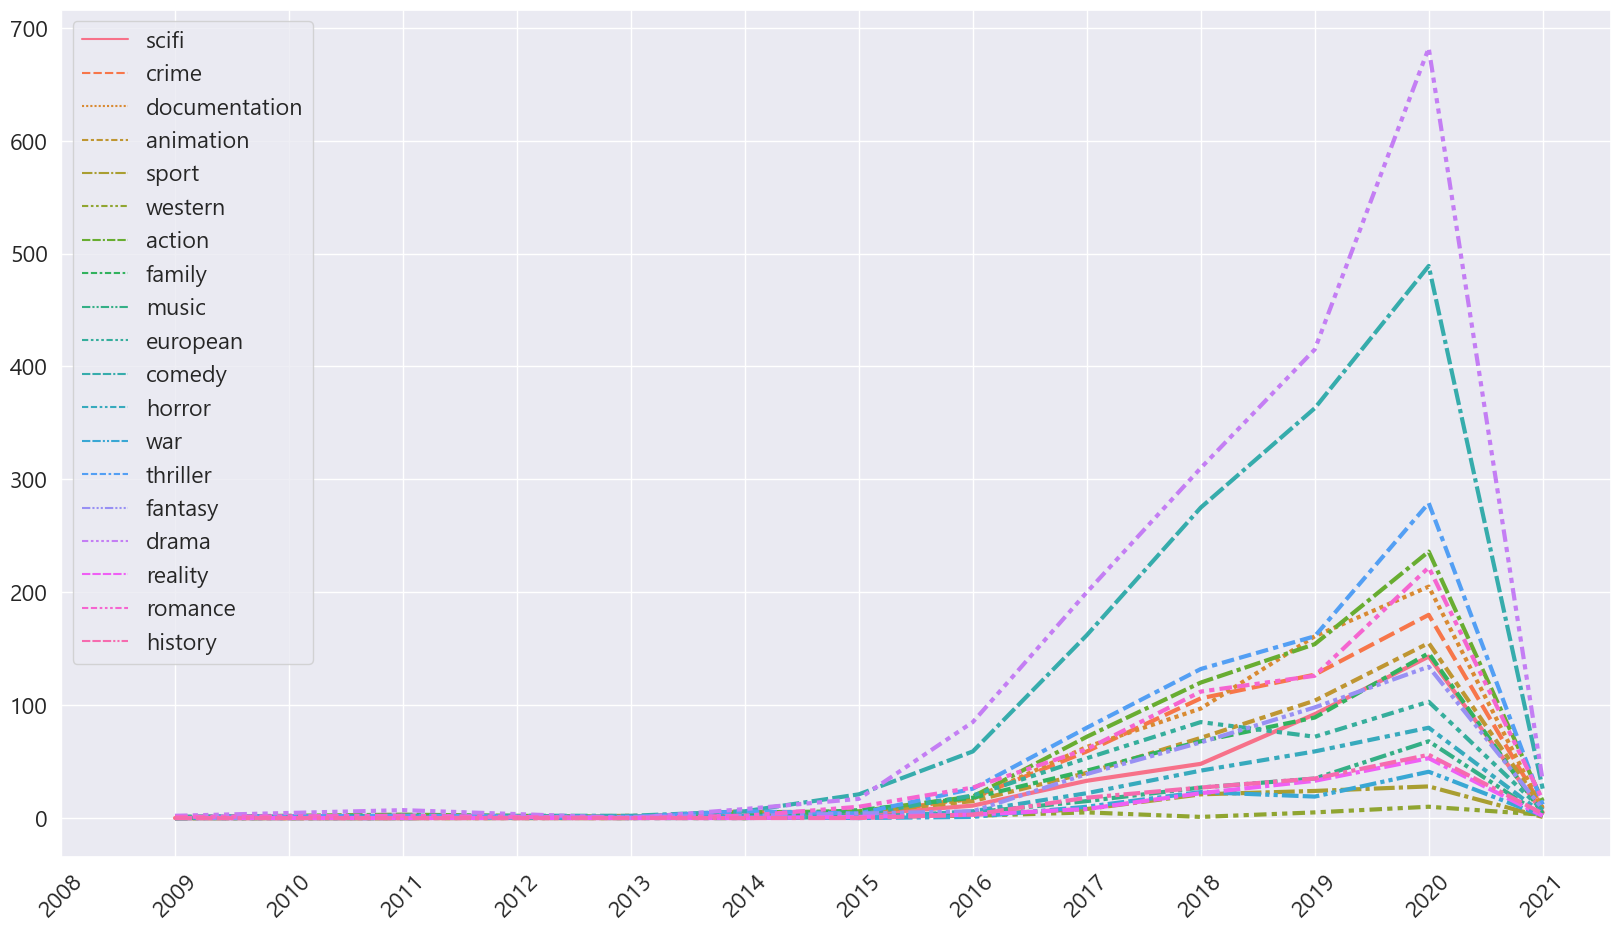

In [75]:
fig = plt.figure(figsize = (20, 11))
sns.lineplot(nf_category_year.T, lw = 3)

plt.xticks(np.arange(2008, 2022, 1), rotation = 45)

plt.show()

In [76]:
nf_category_year.T

,scifi,crime,documentation,animation,sport,western,action,family,music,european,comedy,horror,war,thriller,fantasy,drama,reality,romance,history
2009,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,0,1,0
2011,0,2,0,0,0,0,3,1,0,1,2,0,1,2,0,7,0,2,0
2013,1,1,2,0,0,0,1,1,1,0,2,1,0,1,1,0,0,0,0
2014,2,6,0,2,1,0,5,2,0,0,6,2,1,6,2,8,0,2,0
2015,3,3,4,5,1,1,6,7,1,3,21,0,0,4,4,17,1,10,0
2016,11,18,17,15,3,2,19,18,5,20,59,6,1,26,6,85,3,27,3
2017,33,59,63,40,8,5,72,42,15,53,162,22,10,80,39,200,8,61,18
2018,48,106,97,71,21,1,120,68,27,85,275,42,23,132,67,310,22,112,27
2019,92,127,161,104,24,5,154,89,35,72,363,59,19,161,98,415,33,126,35
2020,143,180,205,155,28,10,236,146,68,103,489,80,41,279,134,682,53,222,56


In [77]:
nf_add_new = nf_add.copy()

In [78]:
nf_add_reset = nf_add.reset_index(drop = True)
category_year = {}
for category in ca_list:
    category_year.setdefault(category, {})
    for year in nf_add_new["추가년도"].unique():
        category_year[category].setdefault(year, [])
    
for idx in range(nf_add_reset.shape[0]):
    for category in nf_add_reset["카테고리"][idx]:
        category_year[category][nf_add_reset["추가년도"][idx]].append(nf_add_reset["추가년도"][idx])

for category in category_year:
    print("#" * 50)
    print(f"{category}의 연도별 추가된 컨텐츠 수")
    for year in nf_add_reset["추가년도"].unique():
        category_year[category][year] = len(category_year[category][year])
        print(f"{year}: {category_year[category][year]}")
        
contents_count = []
for category in category_year:
    contents_count.append(category_year[category])

##################################################
scifi의 연도별 추가된 컨텐츠 수
2020: 143
2019: 92
2018: 48
2021: 5
2016: 11
2017: 33
2011: 0
2014: 2
2013: 1
2015: 3
2009: 0
##################################################
crime의 연도별 추가된 컨텐츠 수
2020: 180
2019: 127
2018: 106
2021: 9
2016: 18
2017: 59
2011: 2
2014: 6
2013: 1
2015: 3
2009: 0
##################################################
documentation의 연도별 추가된 컨텐츠 수
2020: 205
2019: 161
2018: 97
2021: 8
2016: 17
2017: 63
2011: 0
2014: 0
2013: 2
2015: 4
2009: 0
##################################################
animation의 연도별 추가된 컨텐츠 수
2020: 155
2019: 104
2018: 71
2021: 9
2016: 15
2017: 40
2011: 0
2014: 2
2013: 0
2015: 5
2009: 0
##################################################
sport의 연도별 추가된 컨텐츠 수
2020: 28
2019: 24
2018: 21
2021: 1
2016: 3
2017: 8
2011: 0
2014: 1
2013: 0
2015: 1
2009: 0
##################################################
western의 연도별 추가된 컨텐츠 수
2020: 10
2019: 5
2018: 1
2021: 3
2016: 2
2017: 5
2011: 0
2014: 0
2013: 0
2015: 1
20

In [79]:
year_list = nf_add_new["추가년도"].unique()
year_list.sort()
nf_category_year = pd.DataFrame(contents_count, index = ca_list)
nf_category_year = nf_category_year[year_list]
nf_category_year

,2009,2011,2013,2014,2015,2016,2017,2018,2019,2020,2021
scifi,0,0,1,2,3,11,33,48,92,143,5
crime,0,2,1,6,3,18,59,106,127,180,9
documentation,0,0,2,0,4,17,63,97,161,205,8
animation,0,0,0,2,5,15,40,71,104,155,9
sport,0,0,0,1,1,3,8,21,24,28,1
western,0,0,0,0,1,2,5,1,5,10,3
action,1,3,1,5,6,19,72,120,154,236,15
family,0,1,1,2,7,18,42,68,89,146,4
music,0,0,1,0,1,5,15,27,35,68,2
european,0,1,0,0,3,20,53,85,72,103,7


In [80]:
# category_year = {}
# for year in nf_add_new["추가년도"].unique():
#     category_year.setdefault(year, {})
#     for category in ca_list:
#         category_year[year].setdefault(category, [])
    
# for idx in range(nf_add_reset.shape[0]):
#     for category in nf_add_reset["카테고리"][idx]:
#         category_year[nf_add_reset["추가년도"][idx]][category].append(category)

# for year in category_year:
#     print("#" * 50)
#     print(f"{year}년 추가된 컨텐츠 수")
#     for category in ca_list:
#         category_year[year][category] = len(category_year[year][category])
#         print(f"{category}: {category_year[year][category]}")

In [81]:
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager, rc
# windows matplotlib 한글 폰트 오류 문제 해결
font_path = "C:/Windows/Fonts/malgun.ttf" # 폰트 파일 
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
# minus 관련 warning
plt.rcParams['axes.unicode_minus'] = False
# mac os 용 한글 폰트 오류 해결
# rc("font",family = "AppleGothic")

In [82]:
nf_category_year.T

,scifi,crime,documentation,animation,sport,western,action,family,music,european,comedy,horror,war,thriller,fantasy,drama,reality,romance,history
2009,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,0,1,0
2011,0,2,0,0,0,0,3,1,0,1,2,0,1,2,0,7,0,2,0
2013,1,1,2,0,0,0,1,1,1,0,2,1,0,1,1,0,0,0,0
2014,2,6,0,2,1,0,5,2,0,0,6,2,1,6,2,8,0,2,0
2015,3,3,4,5,1,1,6,7,1,3,21,0,0,4,4,17,1,10,0
2016,11,18,17,15,3,2,19,18,5,20,59,6,1,26,6,85,3,27,3
2017,33,59,63,40,8,5,72,42,15,53,162,22,10,80,39,200,8,61,18
2018,48,106,97,71,21,1,120,68,27,85,275,42,23,132,67,310,22,112,27
2019,92,127,161,104,24,5,154,89,35,72,363,59,19,161,98,415,33,126,35
2020,143,180,205,155,28,10,236,146,68,103,489,80,41,279,134,682,53,222,56


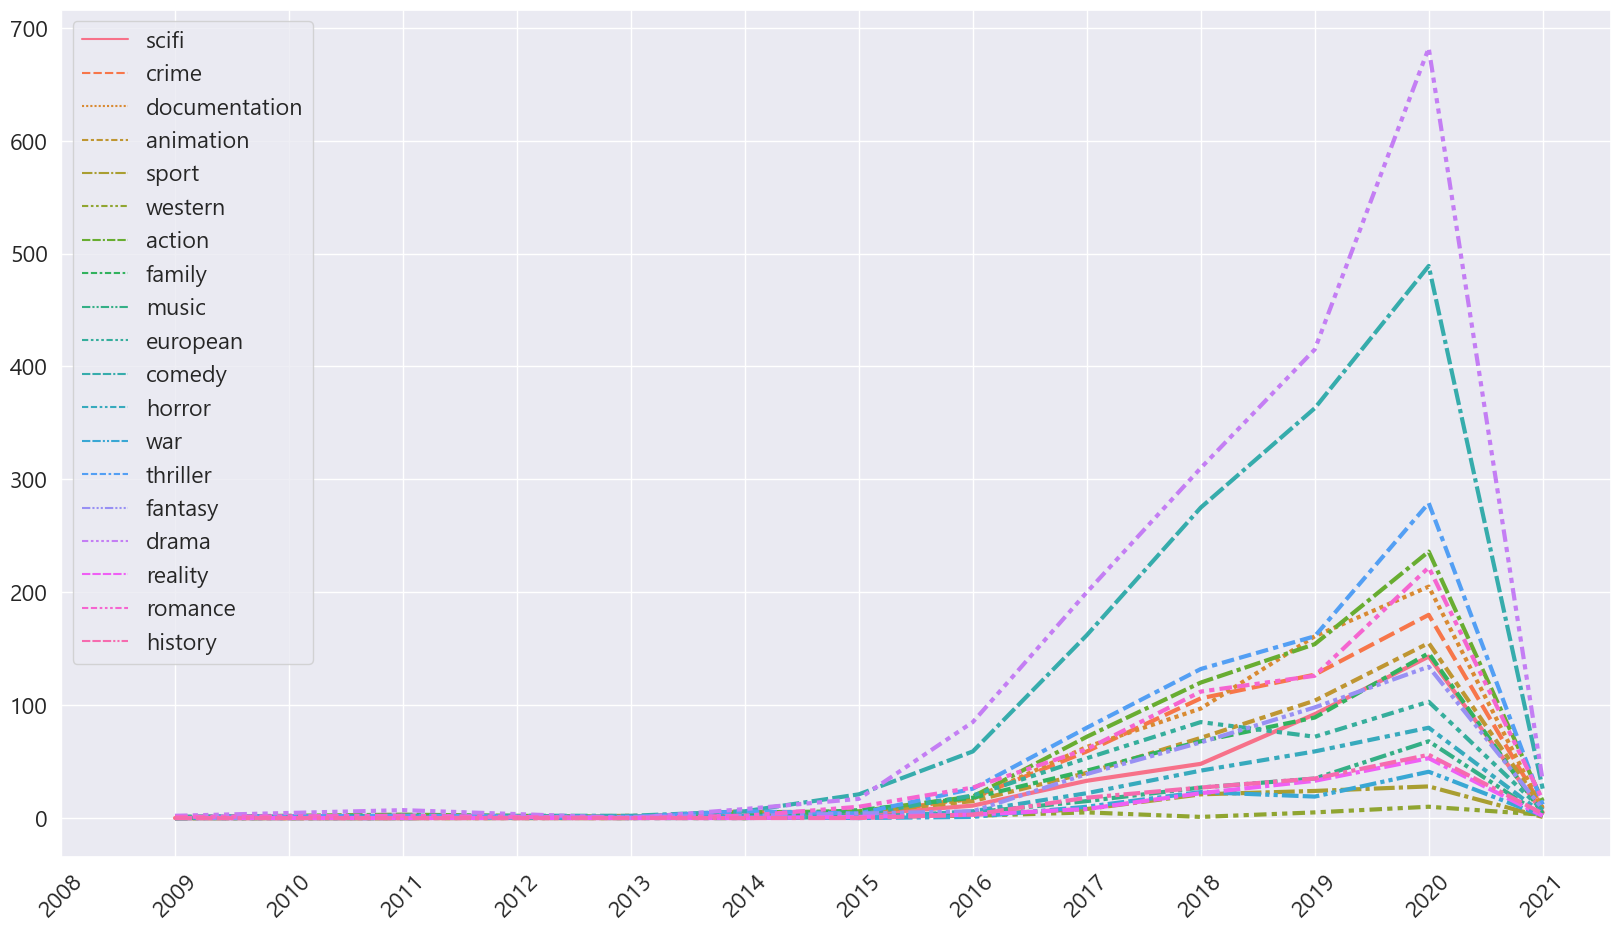

In [83]:
fig = plt.figure(figsize = (20, 11))
sns.lineplot(nf_category_year.T, lw = 3)

plt.xticks(np.arange(2008, 2022, 1), rotation = 45)

plt.show()